[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02635e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


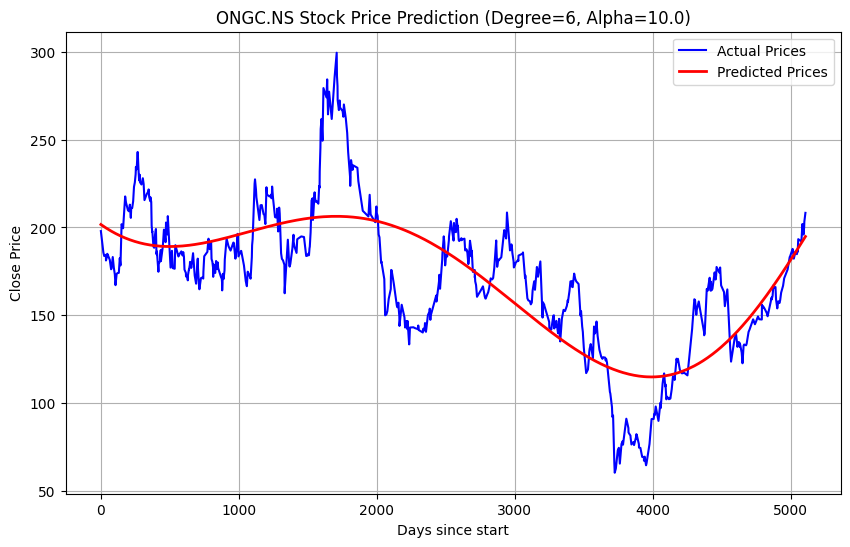

[*********************100%***********************]  1 of 1 completed

ONGC.NS - Mean Squared Error: 714.66



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02635e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


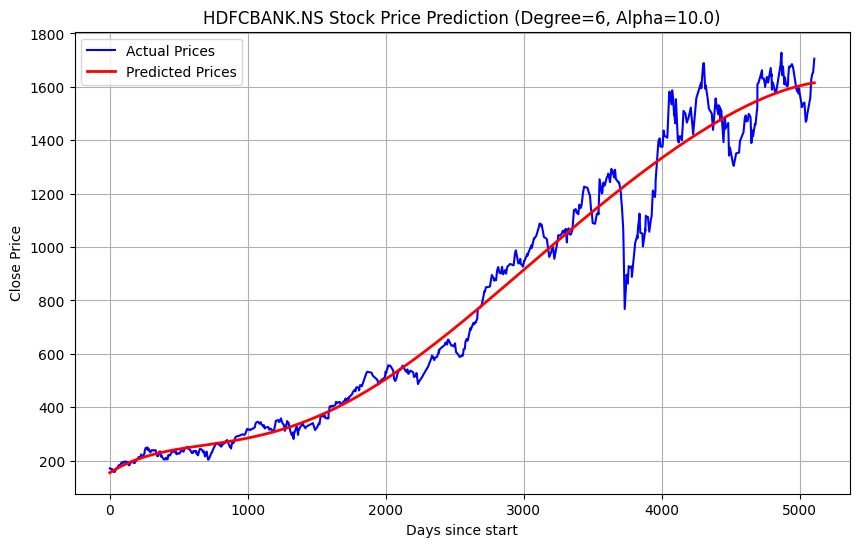

[*********************100%***********************]  1 of 1 completed

HDFCBANK.NS - Mean Squared Error: 5929.45



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02635e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


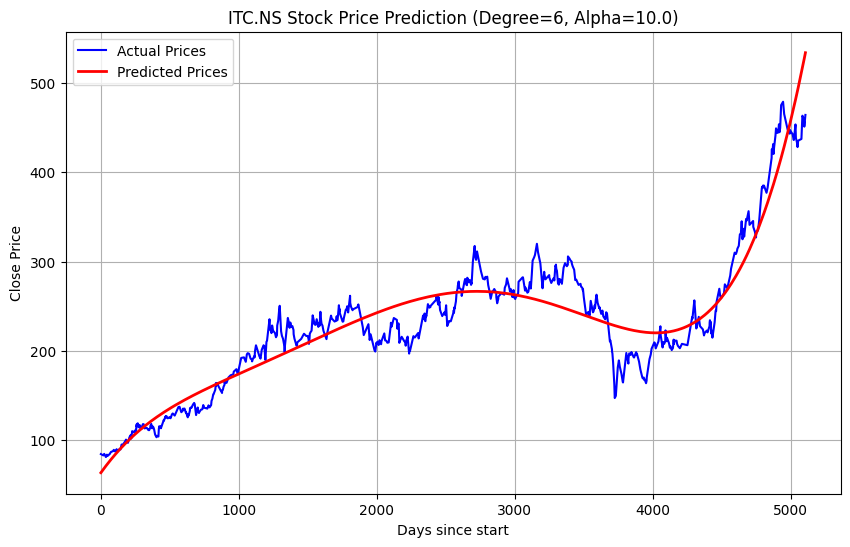

[*********************100%***********************]  1 of 1 completed

ITC.NS - Mean Squared Error: 653.48



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02635e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


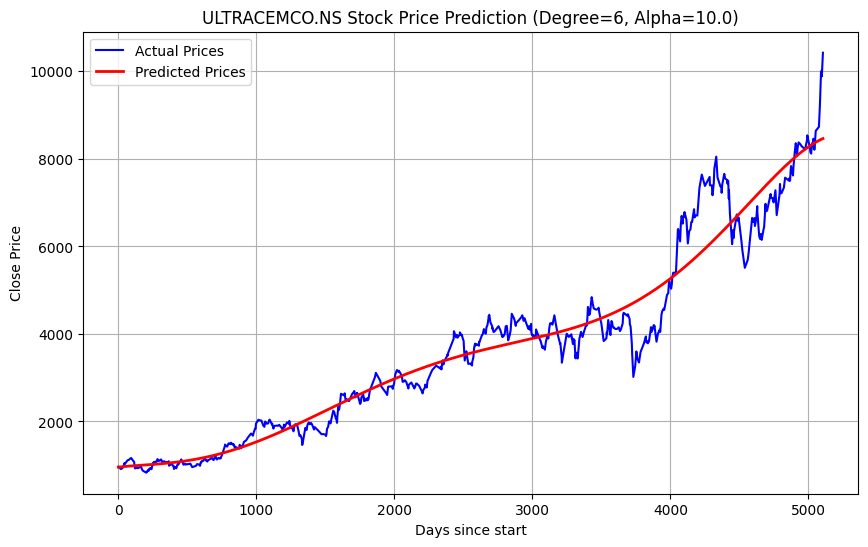

[*********************100%***********************]  1 of 1 completed

ULTRACEMCO.NS - Mean Squared Error: 239307.04



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02635e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


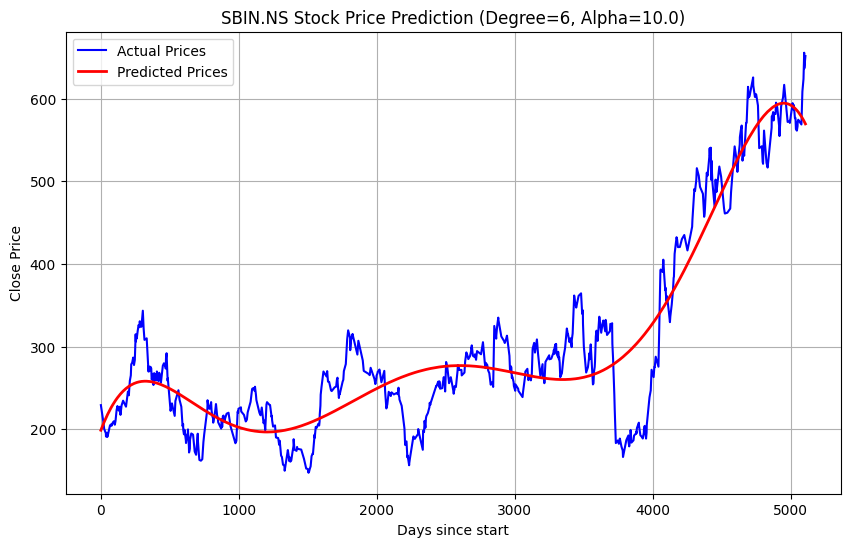

[*********************100%***********************]  1 of 1 completed

SBIN.NS - Mean Squared Error: 1972.61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.02635e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


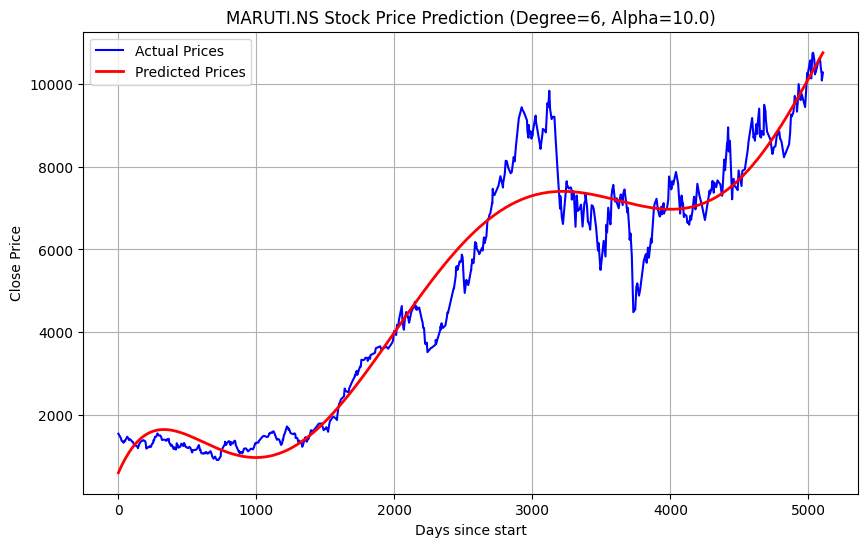

MARUTI.NS - Mean Squared Error: 482765.81


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# List of company tickers
tickers = ['ONGC.NS', 'HDFCBANK.NS', 'ITC.NS', 'ULTRACEMCO.NS', 'SBIN.NS', 'MARUTI.NS']

# Function to fetch data and train model
def fetch_and_predict_stock_price(ticker, degree=6, alpha=10.0):
    # Fetch data from yfinance
    data = yf.download(ticker, start="2010-01-01", end="2024-01-01")
    data['Date'] = data.index
    data['Date'] = pd.to_datetime(data['Date'])
    data['Days'] = (data['Date'] - data['Date'].min()).dt.days

    # Using 'Days' as independent variable and 'Close' as dependent variable
    X = data[['Days']]
    y = data['Close']

    # Polynomial transformation with higher degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Regularization using Ridge Regression
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Sorting for smooth line plot
    sorted_indices = np.argsort(X_test[:, 1])  # Use the original 'Days' feature for sorting
    X_test_sorted = X_test[sorted_indices]
    y_test_sorted = y_test.values[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(X_test_sorted[:, 1], y_test_sorted, color='blue', label='Actual Prices')
    plt.plot(X_test_sorted[:, 1], y_pred_sorted, color='red', label='Predicted Prices', linewidth=2)
    plt.title(f"{ticker} Stock Price Prediction (Degree={degree}, Alpha={alpha})")
    plt.xlabel("Days since start")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    print(f"{ticker} - Mean Squared Error: {mse:.2f}")
    return model

# Process each stock and visualize with higher complexity
models = {ticker: fetch_and_predict_stock_price(ticker, degree=6, alpha=10.0) for ticker in tickers}
